This is a toy example of the use of Ball Mapper. We will start by constructing a collection of points sampled from a unit circle.

This notebook was prepared by Davide Gurnari. 

In [1]:
# uncomment and run this if you are on colab
# !pip install pyballmapper

In [2]:
import numpy as np
import pandas as pd
import networkx as nx

from matplotlib import pyplot as plt
%matplotlib inline

## Generate data

In [3]:
pointcloud = np.array([[np.cos(x), np.sin(x)] for x in np.arange(0, 6.3, 0.1)])
points_df = pd.DataFrame(pointcloud, columns=["x", "y"])

angle_df = pd.DataFrame(np.arange(0, 6.3, 0.1), columns=["angle"])

points_df.head()

,x,y
0,1.000000,0.000000
1,0.995004,0.099833
2,0.980067,0.198669
3,0.955336,0.295520
4,0.921061,0.389418


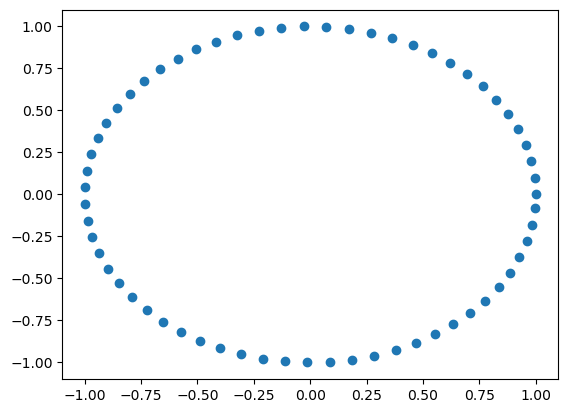

In [4]:
plt.scatter(points_df.x, points_df.y)
plt.show()

## Create BallMapper graph

In [5]:
from pyballmapper import BallMapper

In [6]:
bm = BallMapper(
    X=points_df.values, eps=0.25  # the pointcloud, as a numpy array
)  # the radius of the balls

This are the BM nodes

In [7]:
print(bm.Graph.nodes)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


Each node stores the indices of the points inside it

In [8]:
print(bm.points_covered_by_landmarks[1])

[1, 2, 3, 4, 5]


We can also get this information on a table


In [9]:
bm.points_and_balls()

,point,ball
0,0,0
1,1,0
2,2,0
3,61,0
4,62,0
...,...,...
100,58,20
101,59,20
102,60,20
103,61,20


`bm.Graph` is a NetworkX graph  
We can use NetworkX's plotting functions

https://networkx.org/documentation/stable/tutorial.html#drawing-graphs

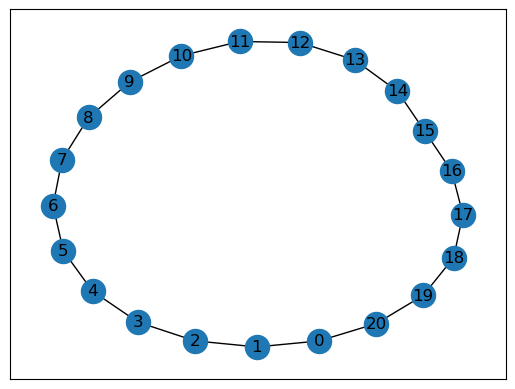

In [10]:
nx.draw_networkx(bm.Graph, pos=nx.spring_layout(bm.Graph, seed=24))

## Colored Ball Mapper graph

In [11]:
from matplotlib.colors import ListedColormap
from matplotlib import colormaps as cm

When creating a BallMapper, we can pass a coloring dataframe of shape `(n_samples, n_coloring_function)`  
In this example, we are using the pointcloud itself

In [12]:
bm = BallMapper(
    X=points_df.values,  # the pointcloud, as a numpy array
    eps=0.25,  # the radius of the balls
    coloring_df=points_df,  # the coloring dataframe
)

Alternatively we can add the coloring dataframe to an existing BallMapper

In [13]:
bm.add_coloring(coloring_df=points_df)

We can color the graph by any column in `coloring_df`  

In [14]:
# here we adopt a standard colour palette
my_red_palette = cm.get_cmap("Reds")

The BallMapper class has a builtin plotting method, buit around `nx.draw_networkx`

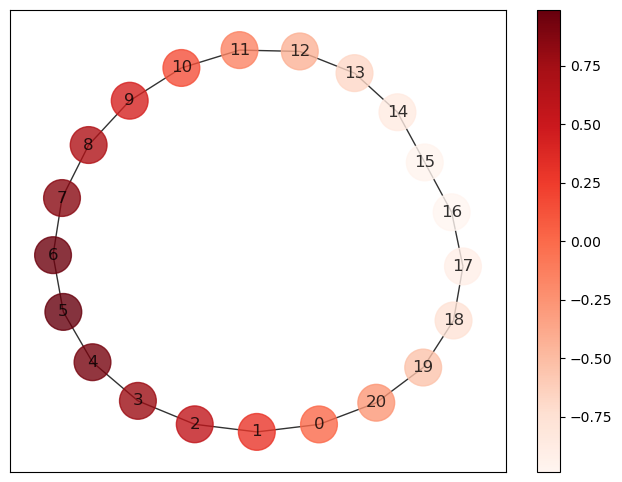

In [15]:
fig, ax = plt.subplots(figsize=(8, 6))
ax = bm.draw_networkx(
    coloring_variable="y", color_palette=my_red_palette, colorbar=True
)
plt.show()

We can change the graph layout using any one of the NetworkX algorithms  
https://networkx.org/documentation/stable/reference/drawing.html#module-networkx.drawing.layout

By default, `bm.draw_networkx` uses `spring_layout`.

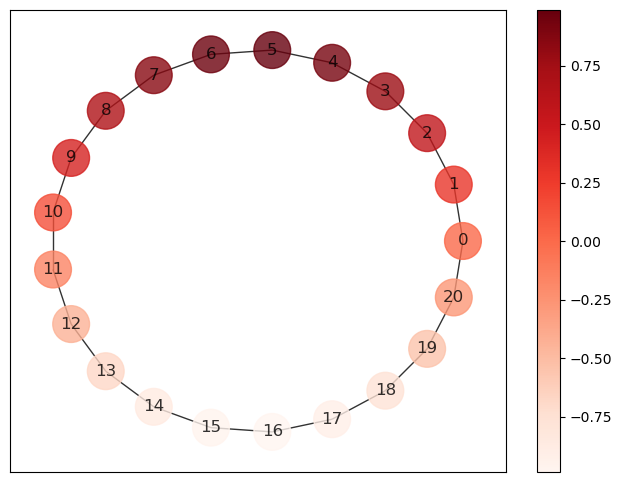

In [16]:
fig, ax = plt.subplots(figsize=(8, 6))
ax = bm.draw_networkx(
    coloring_variable="y",
    color_palette=my_red_palette,
    colorbar=True,
    pos=nx.circular_layout(bm.Graph),
)
plt.show()

We can use a custom function instead of the mean 

Instead of recreating the BallMapper, we can call `add_coloring`

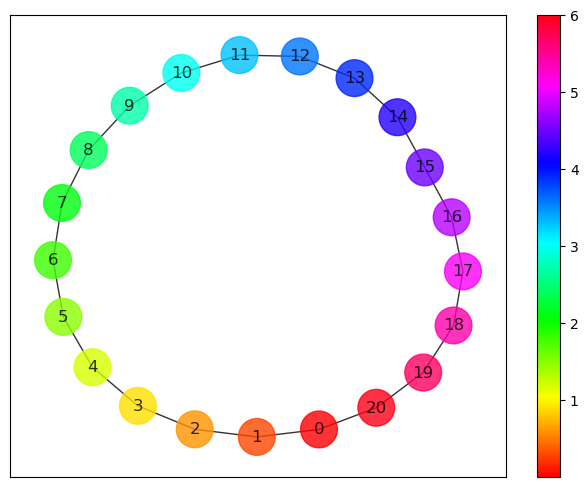

In [17]:
from scipy.stats import circmean

# we use the angles as coloring functions, with circmean instead of artmetic mean
bm.add_coloring(coloring_df=angle_df, custom_function=circmean)

# we can color the graph by any column in coloring_df
# here we adopt a standard colour palette
my_palette = cm.get_cmap("hsv")

fig, ax = plt.subplots(figsize=(8, 6))
# The BallMapper class has a builtin plotting method, buit around nx.draw_networkx
bm.draw_networkx(
    coloring_variable="angle",
    color_palette=my_palette,
    colorbar=True,
)
plt.show()

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

## BM with reverse ordering

In [18]:
# we can change the order of the points
# this will affect the landmarks selection
bm_reverse = BallMapper(
    X=points_df.values,  # the pointcloud, as a numpy array
    eps=0.25,  # the radius of the balls
    order=list(reversed(range(len(points_df.values)))),  # reverse ordering
)

In [19]:
for idx in [1, 2]:
    print("BM")
    print("the landmark of cluster {} in BM is {}".format(idx, bm.Graph.nodes[idx]))
    print("it covers the points {}".format(bm.points_covered_by_landmarks[idx]))
    print()
    print("BM reversed")
    print(
        "the landmark of cluster {} in BM reverse is {}".format(
            idx, bm_reverse.Graph.nodes[idx]
        )
    )
    print("it covers the points {}".format(bm_reverse.points_covered_by_landmarks[idx]))
    print("\n\n")

BM
the landmark of cluster 1 in BM is {'landmark': 3, 'points covered': array([1, 2, 3, 4, 5]), 'size': 5, 'x': 0.9458101576276263, 'y': 0.2925733670032165, 'color': (1.0, 0.2779414544120426, 0.0, 1.0), 'angle': 0.3}
it covers the points [1, 2, 3, 4, 5]

BM reversed
the landmark of cluster 1 in BM reverse is {'landmark': 59, 'points covered': array([61, 60, 59, 58, 57]), 'size': 5}
it covers the points [61, 60, 59, 58, 57]



BM
the landmark of cluster 2 in BM is {'landmark': 6, 'points covered': array([4, 5, 6, 7, 8]), 'size': 5, 'x': 0.8171056134869181, 'y': 0.5590120264890206, 'color': (1.0, 0.5790446966917554, 0.0, 1.0), 'angle': 0.6}
it covers the points [4, 5, 6, 7, 8]

BM reversed
the landmark of cluster 2 in BM reverse is {'landmark': 56, 'points covered': array([58, 57, 56, 55, 54]), 'size': 5}
it covers the points [58, 57, 56, 55, 54]





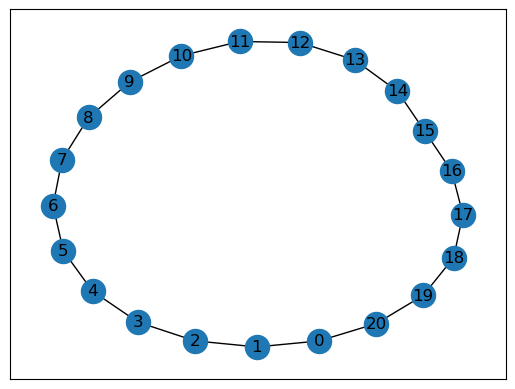

In [20]:
# but the shape of the graph is the same
nx.draw_networkx(bm_reverse.Graph, pos=nx.spring_layout(bm.Graph, seed=24))

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

## Fancy visualizations using Bokeh
https://docs.bokeh.org/en/latest/docs/installation.html

In [21]:
from pyballmapper.plotting import graph_GUI

In [22]:
from bokeh.plotting import show, output_file

In [23]:
# create a GUI with input our BM graph,
# we need color palette
my_red_palette = cm.get_cmap("Reds")

# and a dataframe with coloring functions (one value per point in the pointcloud)
# we use the points themself as coloring functions
bm.add_coloring(coloring_df=points_df)
my_fancy_gui = graph_GUI(bm.Graph, my_red_palette, tooltips_variables=["x", "y"])
my_fancy_gui.color_by_variable("y")

color by variable y 
MIN_VALUE: -0.986, MAX_VALUE: 0.988


(-0.9862311514641753, 0.9875482631007362)

In [24]:
# creates an html file with the graph
# and opens it in another tab
show(my_fancy_gui.plot)

In [25]:
# if you are on colab
# save the output html and download it
output_file("circle_BM.html")
# save(my_fancy_gui.plot)

In [26]:
# this cell allows for bokeh plots to be displayed inside jupyter notebooks
from bokeh.io import output_notebook, reset_output

reset_output()
output_notebook()

Loading BokehJS ...

In [27]:
bm.add_coloring(coloring_df=angle_df, custom_function=circmean)

my_palette = cm.get_cmap("hsv")

my_fancy_gui2 = graph_GUI(bm.Graph, my_palette, tooltips_variables=["x", "y"])
my_fancy_gui2.color_by_variable("y")

# we can color the edges with the average color of their nodes
my_fancy_gui2.color_edges()
my_fancy_gui2.plot.background_fill_color = "black"

show(my_fancy_gui2.plot)

color by variable y 
MIN_VALUE: -0.986, MAX_VALUE: 0.988


<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

## Fancy visualizations using KeplerMapper
wrapper around the `KeplerMapper.visualize` method

https://kepler-mapper.scikit-tda.org/en/latest/reference/stubs/kmapper.KeplerMapper.html#kmapper.KeplerMapper.visualize

you can install it via 
```
pip install kmapper
```

In [28]:
from pyballmapper.plotting import kmapper_visualize

kmapper_visualize(
    bm, coloring_df=points_df, path_html="output.html", title="Circle BallMapper"
)